In [31]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [32]:
torch.manual_seed(111)

In [33]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

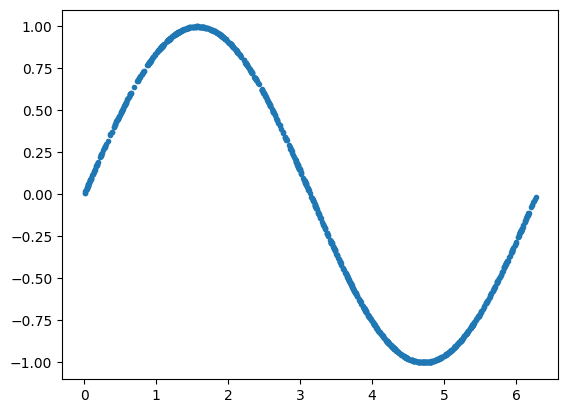

In [34]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [35]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [36]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [37]:
discriminator = Discriminator()

In [38]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

In [39]:
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()

In [40]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [41]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.21308739483356476
Epoch: 0 Loss G.: 1.7989581823349
Epoch: 10 Loss D.: 0.6099680662155151
Epoch: 10 Loss G.: 0.9077385067939758
Epoch: 20 Loss D.: 0.6200631260871887
Epoch: 20 Loss G.: 0.9532094597816467
Epoch: 30 Loss D.: 0.6124153137207031
Epoch: 30 Loss G.: 0.9558998346328735
Epoch: 40 Loss D.: 0.6650296449661255
Epoch: 40 Loss G.: 0.8365310430526733
Epoch: 50 Loss D.: 0.6603741645812988
Epoch: 50 Loss G.: 0.8846002817153931
Epoch: 60 Loss D.: 0.6199278235435486
Epoch: 60 Loss G.: 1.0101035833358765
Epoch: 70 Loss D.: 0.7135947942733765
Epoch: 70 Loss G.: 0.6636365652084351
Epoch: 80 Loss D.: 0.6268820762634277
Epoch: 80 Loss G.: 0.8861529231071472
Epoch: 90 Loss D.: 0.6730433106422424
Epoch: 90 Loss G.: 0.6713212132453918
Epoch: 100 Loss D.: 0.6388757228851318
Epoch: 100 Loss G.: 0.7683221101760864
Epoch: 110 Loss D.: 0.6831697821617126
Epoch: 110 Loss G.: 0.7255038619041443
Epoch: 120 Loss D.: 0.6909633874893188
Epoch: 120 Loss G.: 0.7029704451560974
Epoch: 130

In [42]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

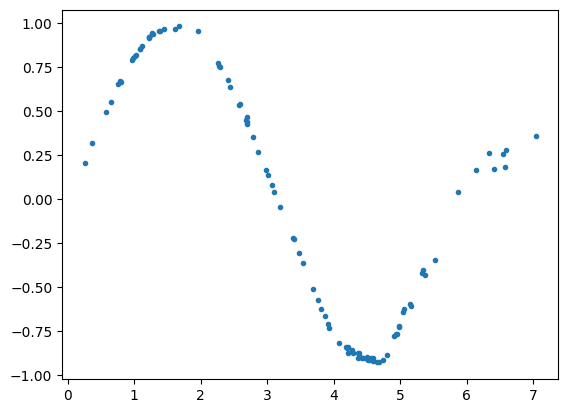

In [43]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")